In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans



import matplotlib.pyplot as plt

# Load the data 
mcdonalds = pd.read_csv('mcdonalds.csv')

# Display the column names
print("Column names:", mcdonalds.columns.tolist())

# Display dimensions of the dataset
print("Dataset dimensions:", mcdonalds.shape)

# Display the first 3 rows of the dataset
print("First 3 rows of the dataset:")
print(mcdonalds.head(3))


Column names: ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']
Dataset dimensions: (1453, 15)
First 3 rows of the dataset:
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [2]:
# Extract the first 11 columns
MD_x = mcdonalds.iloc[:, :11]

# Convert 'Yes' entries to 1 and 'No' entries to 0
MD_x = (MD_x == 'Yes').astype(int)

# Calculate and display the column-wise mean values, rounded to 2 decimal places
col_means = MD_x.mean().round(2)
print("Column-wise mean values:\n", col_means)

Column-wise mean values:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [3]:
# Initialize PCA and fit on the binary data
pca = PCA(n_components=11)  # Full components to match R output
MD_pca = pca.fit(MD_x)

# Display explained variance ratios for each component
print("Explained Variance Ratios:\n", np.round(MD_pca.explained_variance_ratio_, 4))

# Cumulative variance explained by each component
cumulative_variance = np.cumsum(MD_pca.explained_variance_ratio_).round(4)
print("Cumulative Variance:\n", cumulative_variance)

# Print PCA component loadings (factor loadings), rounded to 2 decimal places
loadings = np.round(MD_pca.components_.T, 2)
print("PCA Loadings:\n", loadings)

Explained Variance Ratios:
 [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Variance:
 [0.2994 0.4922 0.6253 0.7084 0.7679 0.8182 0.862  0.9016 0.9383 0.9707
 1.    ]
PCA Loadings:
 [[-0.48  0.36 -0.3   0.06 -0.31  0.17 -0.28  0.01  0.57 -0.11  0.05]
 [-0.16  0.02 -0.06 -0.14  0.28 -0.35 -0.06 -0.11 -0.02 -0.67 -0.54]
 [-0.01  0.02 -0.04  0.2   0.07 -0.36  0.71  0.38  0.4  -0.08  0.14]
 [ 0.12 -0.03 -0.32 -0.35 -0.07 -0.41 -0.39  0.59 -0.16 -0.01  0.25]
 [ 0.3  -0.06 -0.8   0.25  0.36  0.21  0.04 -0.14 -0.    0.01  0.  ]
 [-0.11 -0.09 -0.06 -0.1   0.11 -0.59 -0.09 -0.63  0.17  0.24  0.34]
 [-0.34 -0.61 -0.15  0.12 -0.13 -0.1  -0.04  0.14  0.08  0.43 -0.49]
 [-0.47  0.31 -0.29 -0.   -0.21 -0.08  0.36 -0.07 -0.64  0.08  0.02]
 [ 0.33  0.6   0.02  0.07 -0.   -0.26 -0.07  0.03  0.07  0.45 -0.49]
 [-0.21  0.08  0.19  0.76  0.29 -0.18 -0.35  0.18 -0.19 -0.04  0.16]
 [ 0.37 -0.14 -0.09  0.37 -0.73 -0.21 -0.03 -0.17 -0.07 -0.29 -0.04]]


Text(0.5, 1.0, 'Projection of Consumers in Principal Component Space')

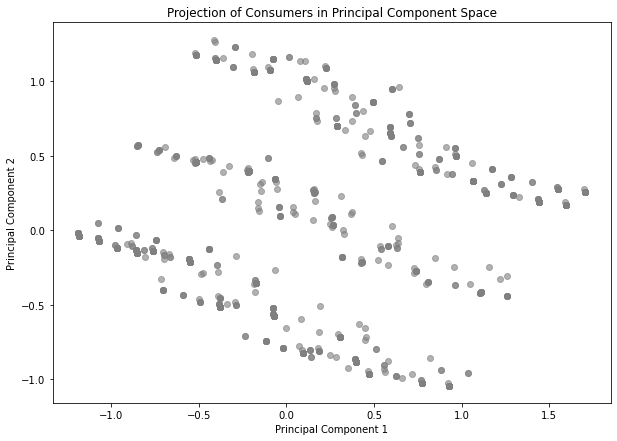

In [4]:
# Project data into the principal component space
MD_pca_projection = pca.transform(MD_x)

# Set up plot for the first two principal components
plt.figure(figsize=(10, 7))
plt.scatter(MD_pca_projection[:, 0], MD_pca_projection[:, 1], color="grey", alpha=0.6, label="Consumers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Consumers in Principal Component Space")

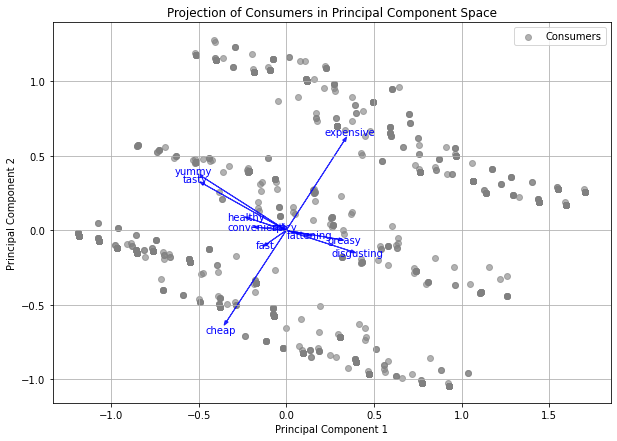

In [5]:
# Project data into the principal component space
plt.figure(figsize=(10, 7))
plt.scatter(MD_pca_projection[:, 0], MD_pca_projection[:, 1], color="grey", alpha=0.6, label="Consumers")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Projection of Consumers in Principal Component Space")

# Add the variable loadings as arrows
for i, (x, y) in enumerate(loadings[:, :2]):  # Use only the first two principal components
    plt.arrow(0, 0, x, y, color="blue", alpha=0.8, head_width=0.02)
    plt.text(x * 1.1, y * 1.1, MD_x.columns[i], color="blue", ha='center', va='center')

# Display the legend and plot
plt.legend()  # Ensure legend shows the "Consumers" label
plt.grid()
plt.show()


In [6]:
# Define range of segments to try (from 2 to 8)
num_segments = range(2, 9)
inertia = []

# Run Agglomerative Clustering for each segment number
for k in num_segments:
    clustering = AgglomerativeClustering(n_clusters=k)
    clustering.fit(MD_x)
    inertia.append(clustering.n_clusters)  # Note: Agglomerative doesn't use inertia directly



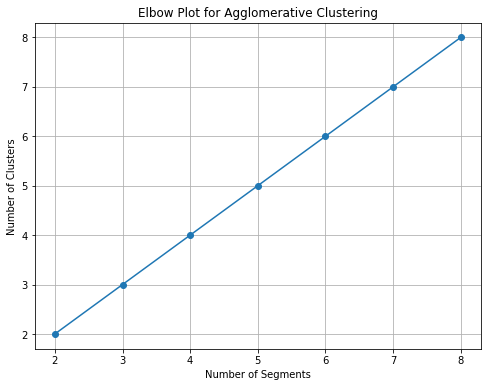

In [7]:
# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(num_segments, inertia, marker='o')
plt.xlabel("Number of Segments")
plt.ylabel("Number of Clusters")
plt.title("Elbow Plot for Agglomerative Clustering")
plt.grid()
plt.show()
